<a href="https://colab.research.google.com/github/ruu1004/MinorProject/blob/main/analysis_of_garments_productivity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/garments_worker_productivity.csv')
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [ ]:
df['productivity_difference'] = df['actual_productivity'] - df['targeted_productivity']
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,productivity_difference
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,0.140725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500,0.136500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,0.000570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,0.000570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,0.000382


In [ ]:
df['department'] = df['department'].replace('sweing', 'sewing')
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,productivity_difference
0,1/1/2015,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,0.140725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500,0.136500
2,1/1/2015,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,0.000570
3,1/1/2015,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,0.000570
4,1/1/2015,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,0.000382


In [ ]:
unique_values = df['department'].unique()
print(unique_values)
df['department'] = df['department'].replace('finishing ', 'finishing')

['sewing' 'finishing ' 'finishing']


Exploratory Data Analysis
Plotting histograms and pairplots

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

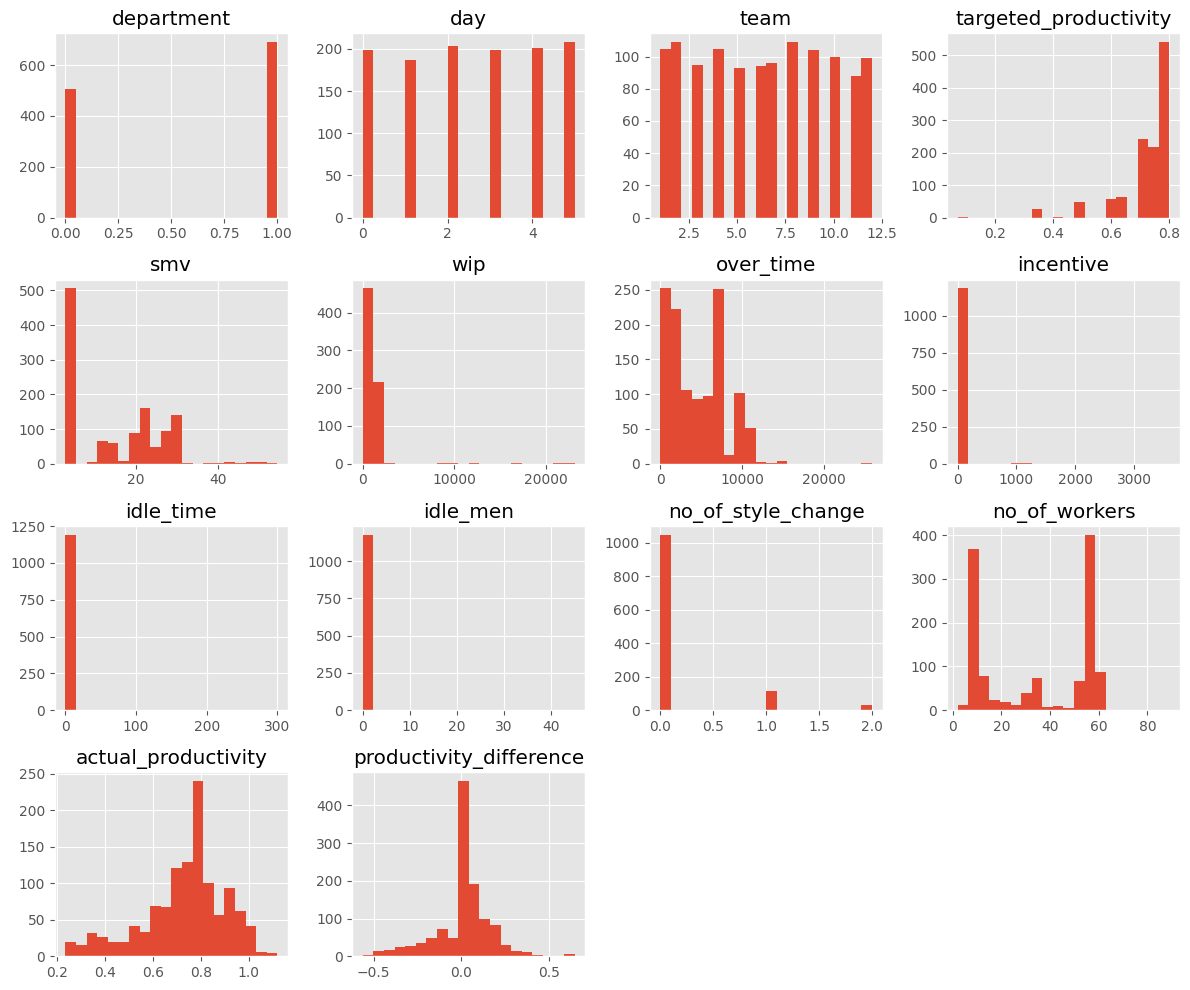

In [ ]:
df.hist(bins=20, figsize=(12, 10))
plt.tight_layout()
plt.show()

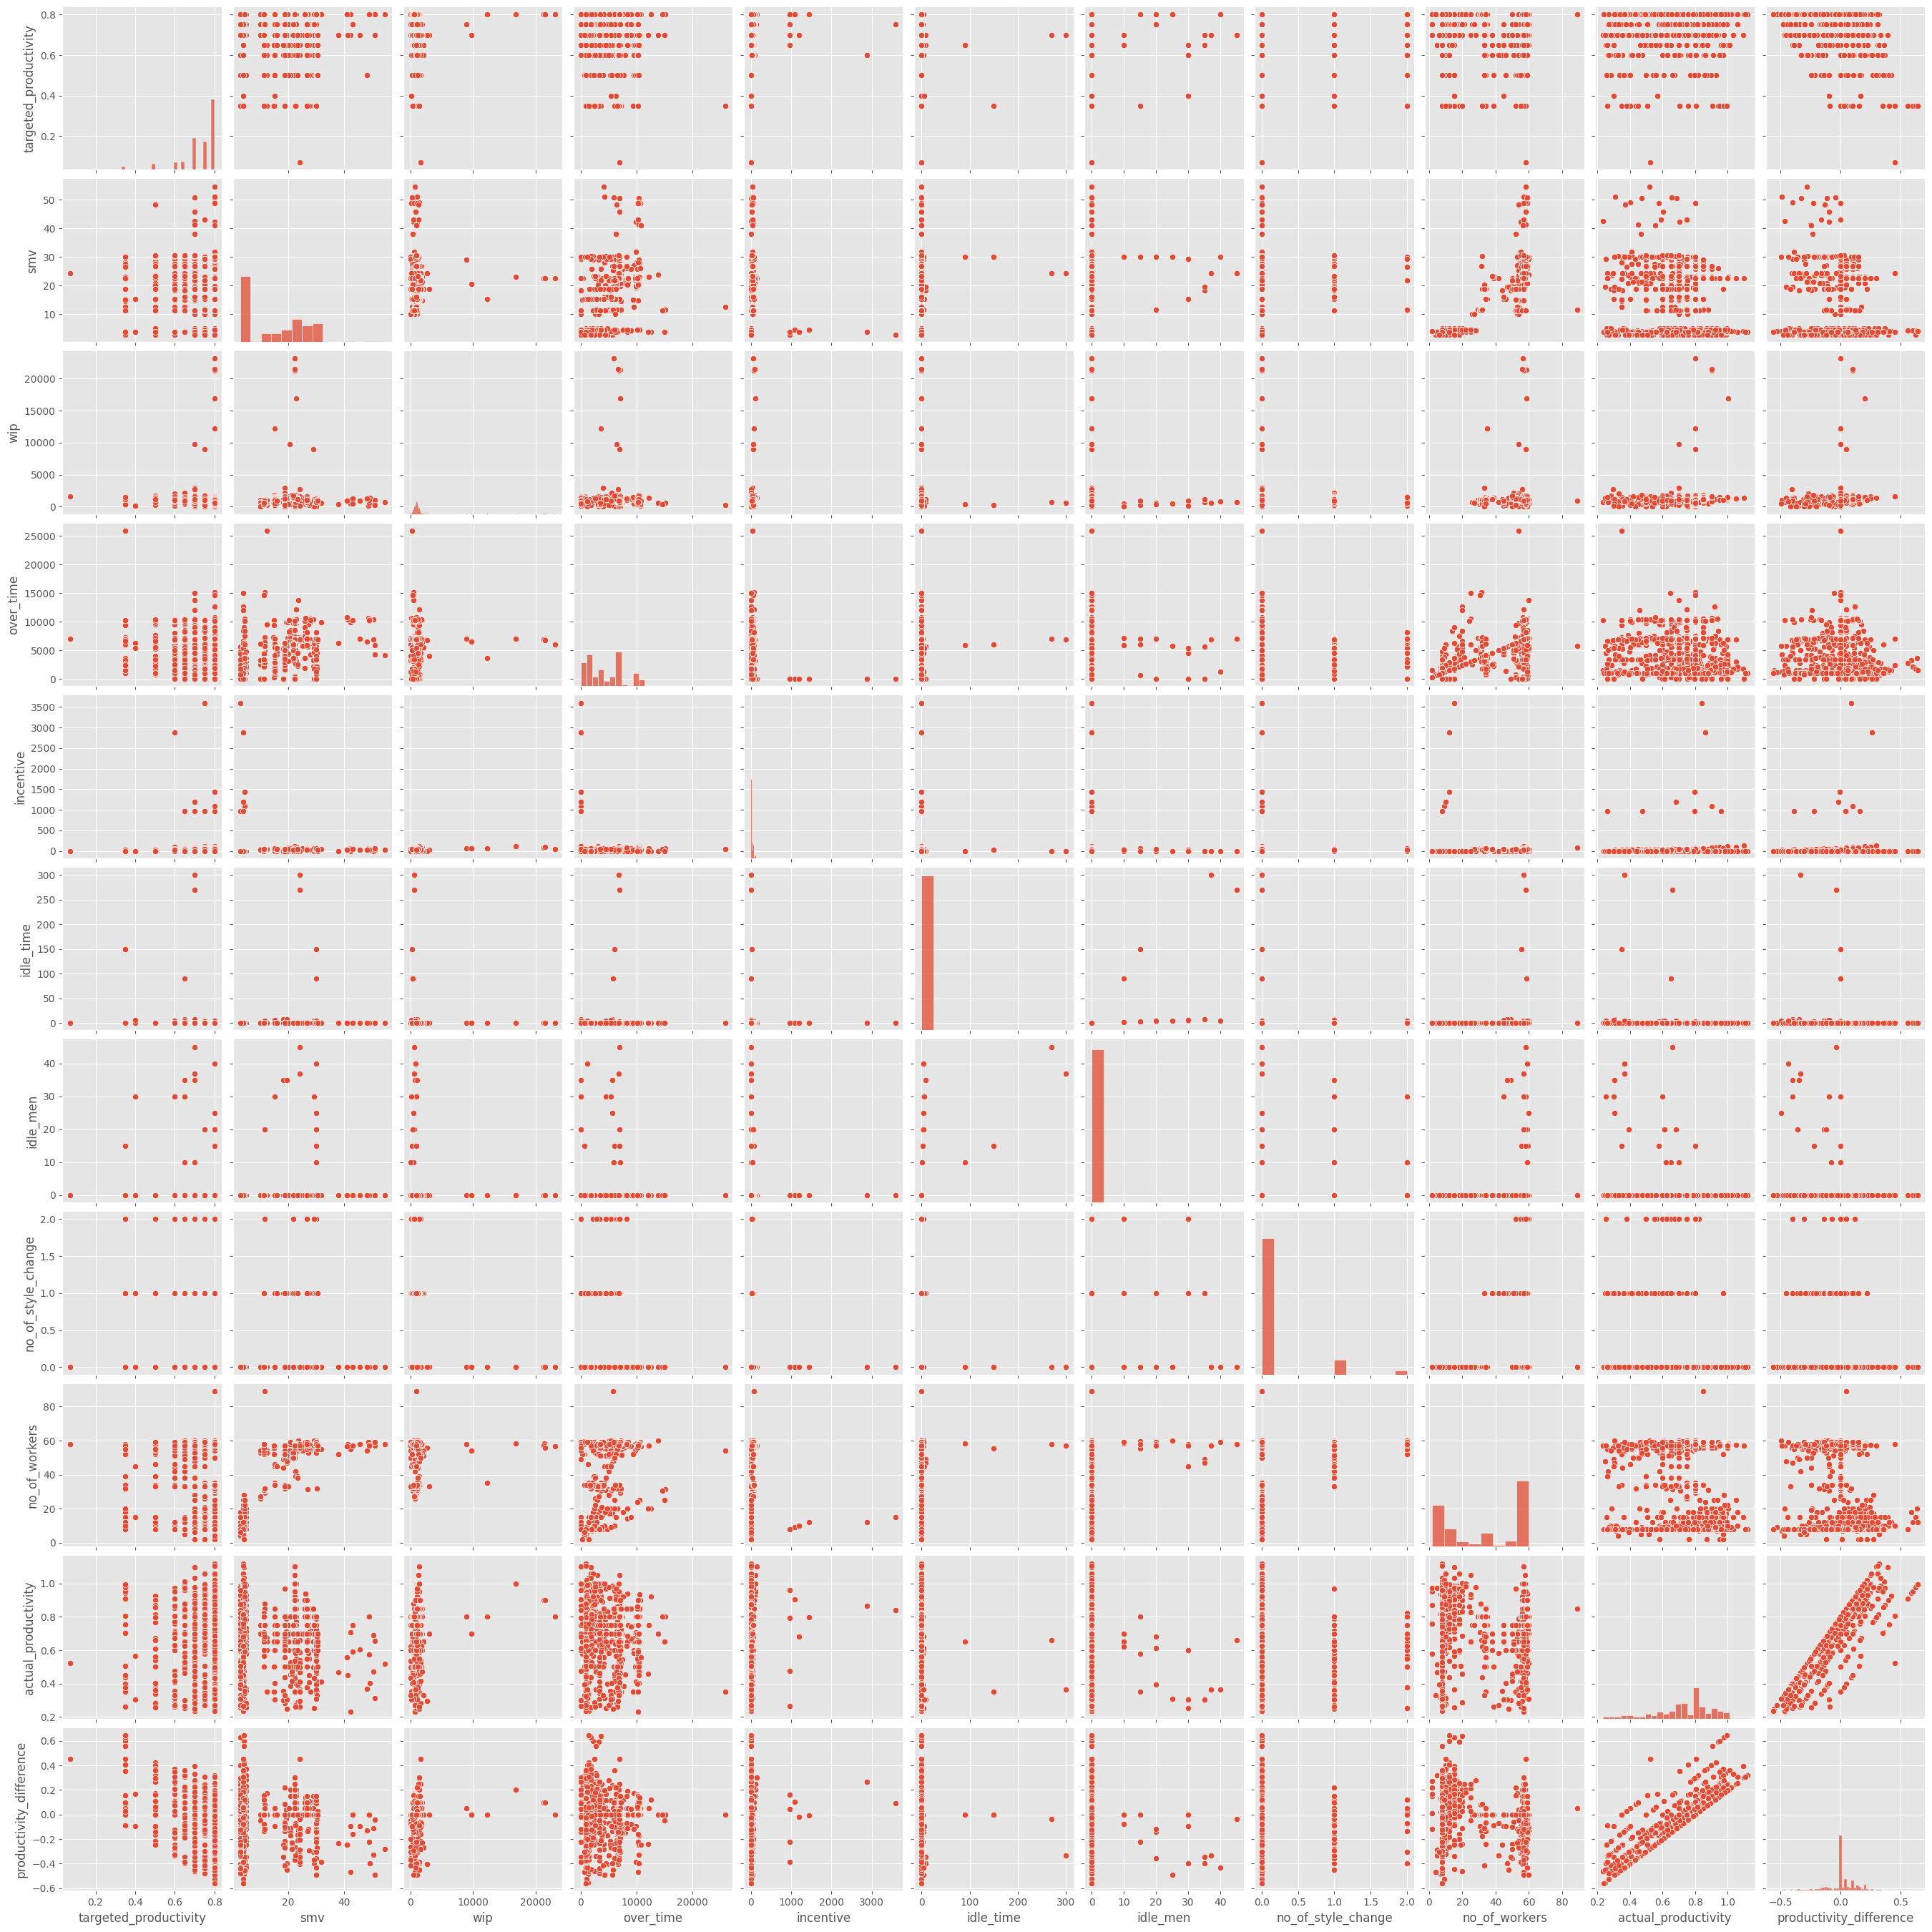

In [ ]:
numeric_columns = [
    'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
    'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
    'actual_productivity', 'productivity_difference'
]
sns.pairplot(df[numeric_columns])
plt.show()

In [ ]:
x = df['over_time']
y = df['productivity_difference']

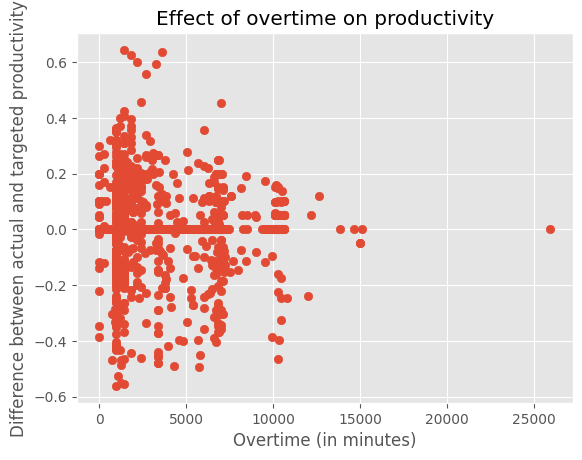

In [ ]:
plt.scatter(x, y)
plt.xlabel('Overtime (in minutes)')
plt.ylabel('Difference between actual and targeted productivity')
plt.title('Effect of overtime on productivity')
plt.grid(True)
plt.show()

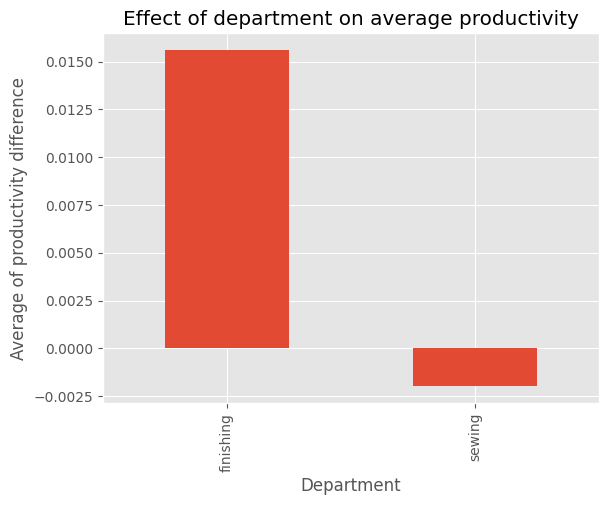

In [ ]:
df.groupby('department')['productivity_difference'].mean().plot(kind='bar')
plt.xlabel('Department')
plt.ylabel('Average of productivity difference')
plt.title('Effect of department on average productivity')
plt.show()

In [ ]:
max_prod_diff = max(df['productivity_difference'])
min_prod_diff = min(df['productivity_difference'])
print(max_prod_diff)
print(min_prod_diff)

0.644375
-0.561958333


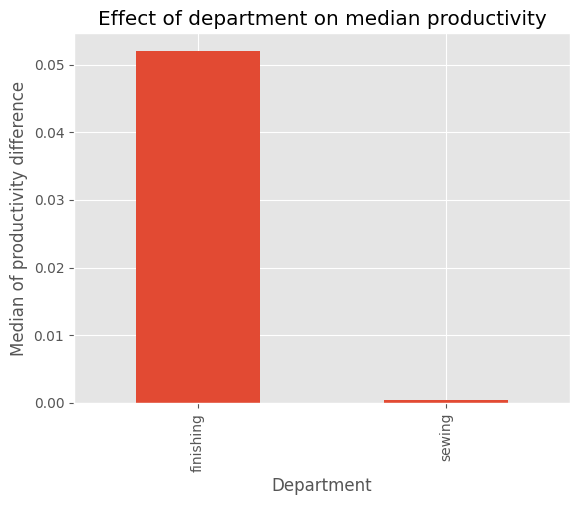

In [ ]:
df.groupby('department')['productivity_difference'].median().plot(kind='bar')
plt.xlabel('Department')
plt.ylabel('Median of productivity difference')
plt.title('Effect of department on median productivity')
plt.show()

In [ ]:
x = df['incentive']
y = df['productivity_difference']

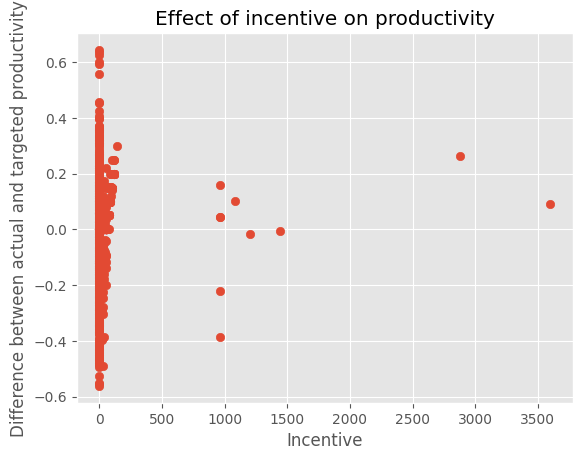

In [ ]:
plt.scatter(x, y)
plt.xlabel('Incentive')
plt.ylabel('Difference between actual and targeted productivity')
plt.title('Effect of incentive on productivity')
plt.grid(True)
plt.show()

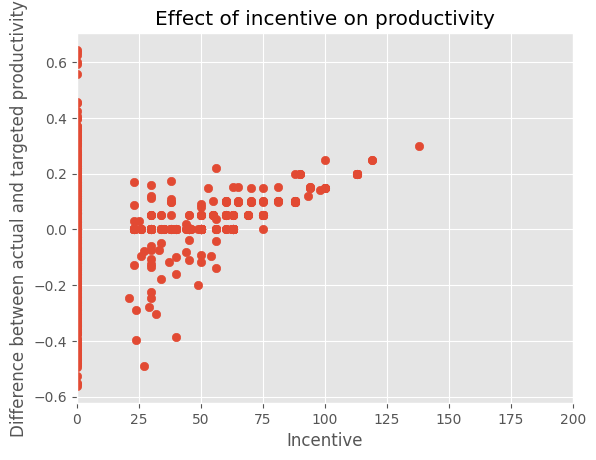

In [ ]:
plt.scatter(x, y)
plt.xlabel('Incentive')
plt.ylabel('Difference between actual and targeted productivity')
plt.title('Effect of incentive on productivity')
plt.xlim(0, 200)
plt.grid(True)
plt.show()


In [ ]:
unique_teams = df['team'].unique()
print(unique_teams)

[ 8  1 11 12  6  7  2  3  9 10  5  4]


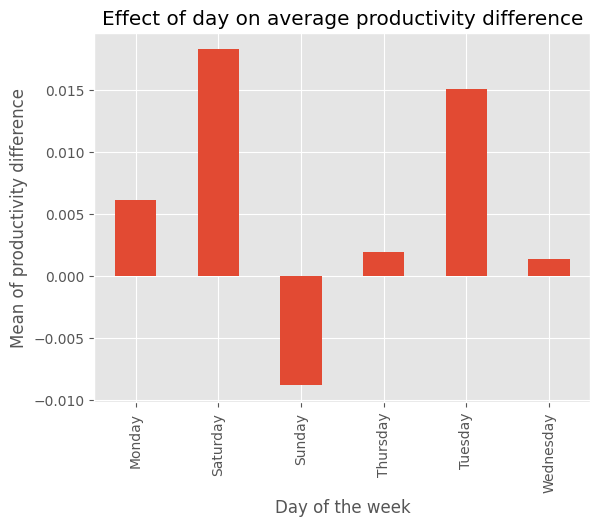

In [ ]:
df.groupby('day')['productivity_difference'].mean().plot(kind='bar')
plt.xlabel('Day of the week')
plt.ylabel('Mean of productivity difference')
plt.title('Effect of day on average productivity difference')
plt.show()

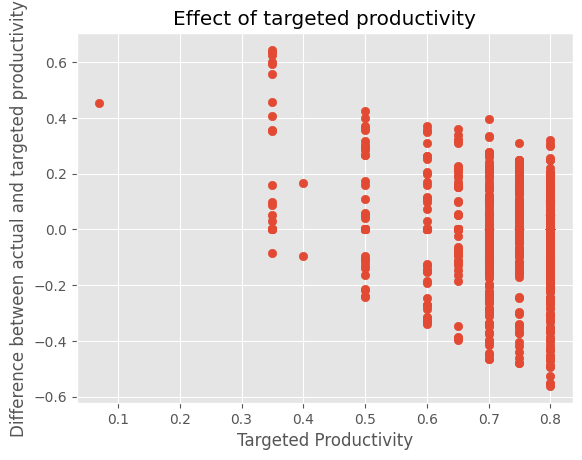

In [ ]:
plt.scatter(df['targeted_productivity'], df['productivity_difference'])
plt.xlabel('Targeted Productivity')
plt.ylabel('Difference between actual and targeted productivity')
plt.title('Effect of targeted productivity')
plt.grid(True)
plt.show()

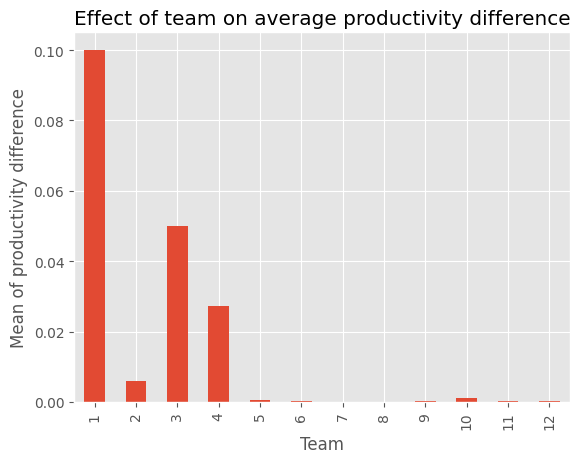

In [ ]:
df.groupby('team')['productivity_difference'].median().plot(kind='bar')
plt.xlabel('Team')
plt.ylabel('Mean of productivity difference')
plt.title('Effect of team on average productivity difference')
plt.show()

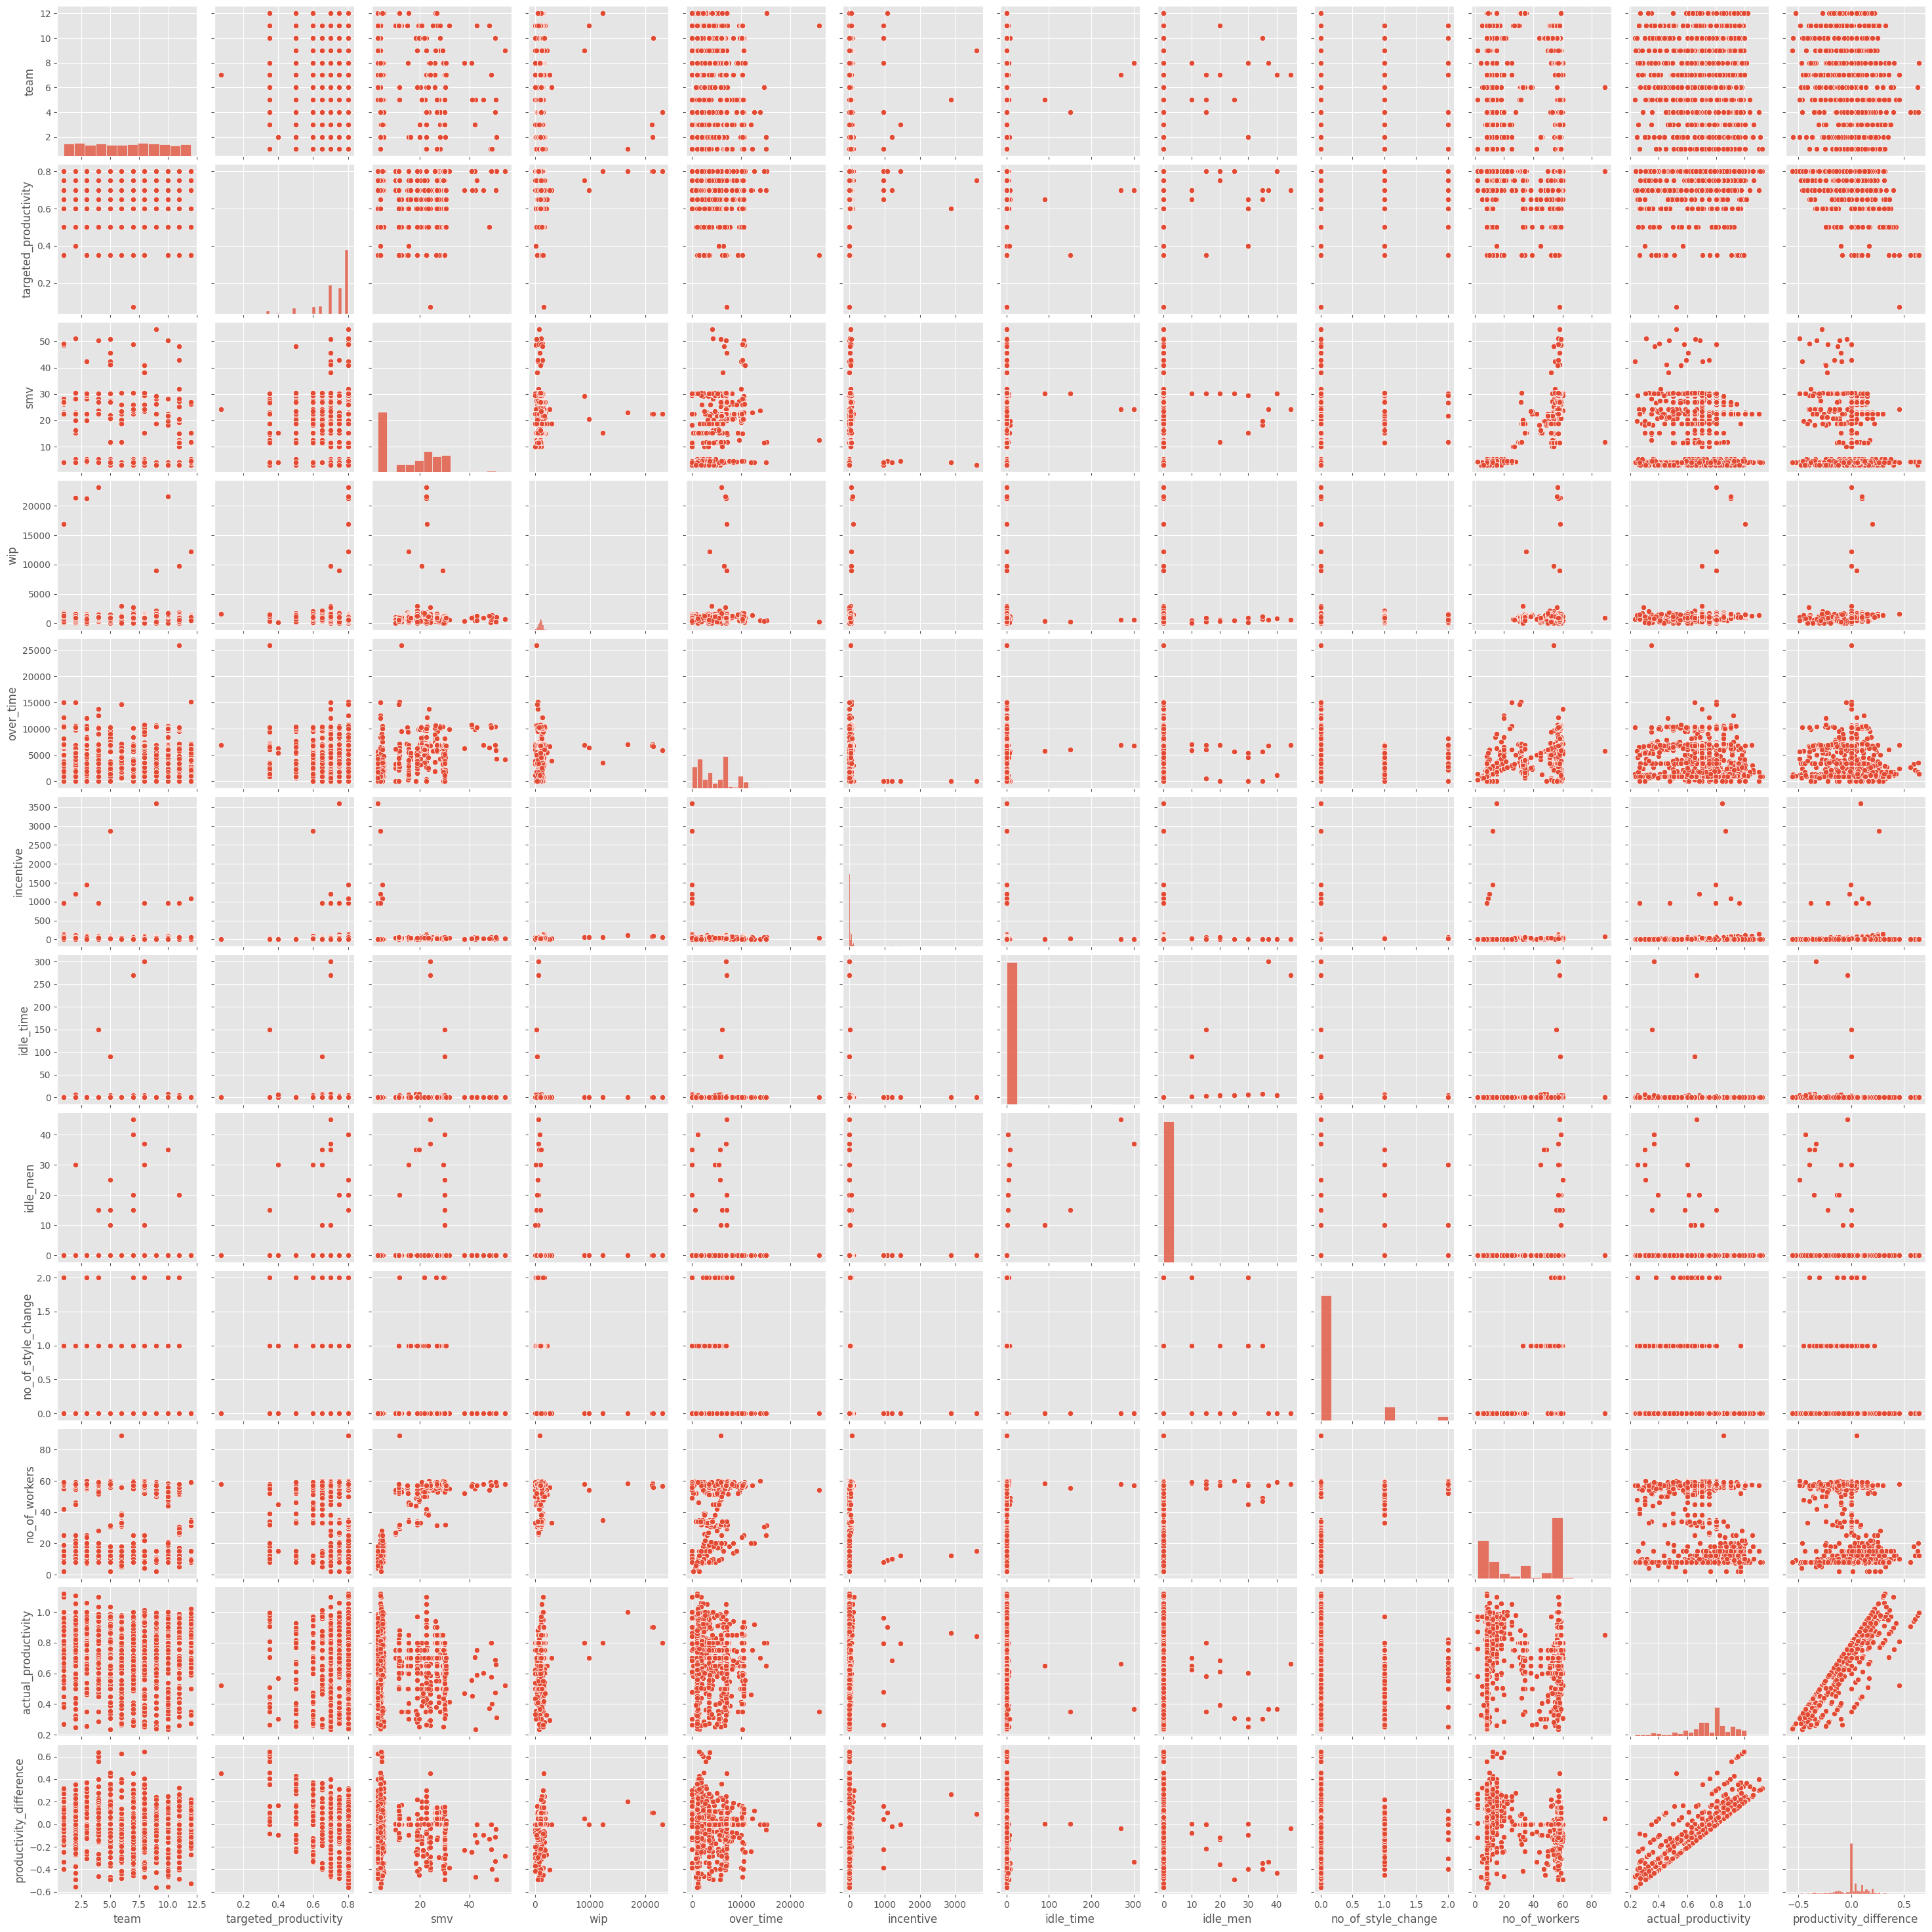

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df, diag_kind='hist')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['department'] = le.fit_transform(df['department'])
df['day'] = le.fit_transform(df['day'])

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

From our EDA we can see the following columns have an effect on the productivity:

Team

Targeted productivity

Day

Department

In [ ]:
le = LabelEncoder()
df['department'] = le.fit_transform(df['department'])
df['day'] = le.fit_transform(df['day'])

In [ ]:
X = df[['team', 'targeted_productivity', 'day', 'department']]
y1 = df['productivity_difference']
y2 = df['actual_productivity']
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
mse_linear_regressor = mean_squared_error(y_test, y_pred)
r2_linear_regressor = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse_linear_regressor}")
print(f"R-squared: {r2_linear_regressor}")

Mean Squared Error: 0.022790260180143244
R-squared: 0.03007778203078537


In [ ]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)


DecisionTreeRegressor()

In [ ]:
y_pred = model.predict(X_test)
mse_decision_tree = mean_squared_error(y_test, y_pred)
r2_decision_tree = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse_decision_tree}")
print(f"R-squared: {r2_decision_tree}")

Mean Squared Error: 0.031007010334370512
R-squared: -0.3196158358170169


In [ ]:
model = SVR()
model.fit(X_train, y_train)

SVR()

In [ ]:
y_pred = model.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred)
r2_svr = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse_svr}")
print(f"R-squared: {r2_svr}")

Mean Squared Error: 0.022262088491163772
R-squared: 0.052556044762066656


In [ ]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred = model.predict(X_test)
mse_random_forest = mean_squared_error(y_test, y_pred)
r2_random_forest = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse_random_forest}")
print(f"R-squared: {r2_random_forest}")

Mean Squared Error: 0.0251802982823735
R-squared: -0.07163896182481433


In [ ]:
print(f"Mean squared error of Decision Tree: {mse_decision_tree}")
print(f"Mean squared error of Linear Regressor: {mse_linear_regressor}")
print(f"Mean squared error of SVR: {mse_svr}")
print(f"Mean squared error of Random Forest: {mse_random_forest}")

Mean squared error of Decision Tree: 0.031007010334370512
Mean squared error of Linear Regressor: 0.022790260180143244
Mean squared error of SVR: 0.022262088491163772
Mean squared error of Random Forest: 0.0251802982823735


In [ ]:
print(f"R^2 of Decision Tree: {r2_decision_tree}")
print(f"R^2 of Linear Regressor: {r2_linear_regressor}")
print(f"R^2 of SVR: {r2_svr}")
print(f"R^2 of Random Forest: {r2_random_forest}")

R^2 of Decision Tree: -0.3196158358170169
R^2 of Linear Regressor: 0.03007778203078537
R^2 of SVR: 0.052556044762066656
R^2 of Random Forest: -0.07163896182481433


Support Vector Regressor looks like the best method to use for this particular case

In [ ]:
model = SVR()
model.fit(X_train, y_train)

SVR()

In [ ]:
X_train.head()

,team,targeted_productivity,day,department
1189,8,0.70,5,1
575,1,0.75,0,0
76,10,0.75,0,0
731,4,0.70,3,0
138,12,0.80,3,1


In [ ]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,productivity_difference
0,1/1/2015,Quarter1,1,3,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,0.140725
1,1/1/2015,Quarter1,0,3,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500,0.136500
2,1/1/2015,Quarter1,1,3,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,0.000570
3,1/1/2015,Quarter1,1,3,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,0.000570
4,1/1/2015,Quarter1,1,3,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,0.000382
